# Solving 2d electrostatics problem numerically

Let's solve electrostatics problem

$$ \nabla^2 \phi = \frac{\rho}{\epsilon_0} $$

with given source charge distribution and boundary conditions.

The poisson's equation can be expressed more explicitly, i.e.,

$$ (\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}) \phi (x,y) = \frac{\rho (x,y)}{\epsilon_0} $$

Discretizing the partial differential operators, we have

$$ \frac{\partial \phi}{\partial x} = \frac{\phi (x+h, y) - \phi (x, y)}{h} $$

$$ \frac{\partial^2 \phi}{\partial x^2} = \frac{\phi(x+h,y) - 2\phi(x,y) + \phi(x-h,y)}{h^2} $$

with some discretizing factor $h$.

Now we have difference equation:

$$ \frac{\phi(x+h,y) - 2\phi(x,y) + \phi(x-h,y)}{h^2} + \frac{\phi(x,y+h) - 2\phi(x,y) + \phi(x,y-h)}{h^2} 
    = \frac{\rho(x,y)}{\epsilon_0} $$

The difference equation can be formulated in 2 ways. One is using matrix, and the other is using stencil operation. Let's do matrix version first.

Since the space is discretized, we can represent the potential as a matrix $\phi(x,y) = \phi_{i,j}$. Here, the difference of coordinates between any neighboring elements is $h$. The source term is also changed to $\rho(x,y) = \rho_{i.j}$. Then the difference equation is transformed into

$$ \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - 4\phi_{i,j}}{h^2} = 
    \frac{\rho_{i,j}}{\epsilon_0} $$
    
Here, the subscripts are $ 2 \leq i \leq N-1 $ and $ 2 \leq j \leq M-1 $. Consequently, the equation is converted into matrix equation:

$$ \begin{bmatrix}
      D    &   -I   &    0   & \cdots &    0   &    0   \\
     -I    &    D   &   -I   & \cdots &    0   &    0   \\
      0    &   -I   &    D   & \cdots &    0   &    0   \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
      0    &    0   &    0   & \cdots &    D   &   -I   \\
      0    &    0   &    0   & \cdots &   -I   &    D
    \end{bmatrix}
    \begin{bmatrix}
    \phi_{2,2} \\
    \phi_{3,2} \\
    \vdots     \\
    \phi_{N-1,2} \\
    \phi_{2,3} \\
    \phi_{3,3} \\
    \vdots     \\
    \phi_{N-1,3} \\
    \phi_{2,M-1} \\
    \phi_{3,M-1} \\
    \vdots     \\
    \phi_{N-1,M-1}
    \end{bmatrix}
    =
    \begin{bmatrix}
    -\frac{h^2}{\epsilon_0}\rho_{2,2} + \phi_{1,2} + \phi_{2,1} \\
    -\frac{h^2}{\epsilon_0}\rho_{3,2} + \phi_{3,1} \\
    \vdots     \\
    -\frac{h^2}{\epsilon_0}\rho_{N-1,2} + \phi_{N,2} + \phi_{N-1,1} \\
    -\frac{h^2}{\epsilon_0}\rho_{2,3} + \phi_{1,3} \\
    -\frac{h^2}{\epsilon_0}\rho_{3,3} \\
    \vdots     \\
    -\frac{h^2}{\epsilon_0}\rho_{N-1,3} + \phi_{N,3} \\
    -\frac{h^2}{\epsilon_0}\rho_{2,M-1} + \phi_{1,M-1} + \phi_{2,M} \\
    -\frac{h^2}{\epsilon_0}\rho_{3,M-1} + \phi_{3,M} \\
    \vdots     \\
    -\frac{h^2}{\epsilon_0}\rho_{N-1,M-1} + \phi_{N,M-1} + \phi_{N-1,M}
    \end{bmatrix}
    $$

where $I$ is $(N-2) \times (N-2)$ identity matrix and $D$ is $(N-2) \times (N-2)$ matrix, given by

$$ D = \begin{bmatrix}
        4  &  -1  &  0  &  0  & \cdots &  0  \\
       -1  &   4  & -1  &  0  & \cdots &  0  \\
        0  &  -1  &  4  & -1  & \cdots &  0  \\
        \vdots  &  \vdots  &  \vdots  &  \vdots  & \ddots &  -1  \\
        0  &  0  &  0  &  0  &  -1  &  4
        \end{bmatrix}
$$

Also note that the boundary elements are brought to right-hand side. 

In [14]:
L = 1
h = 0.05
nstep = Int(L/h)
D = SymTridiagonal(repmat([4], nstep-2), repmat([-1], nstep-2))

18×18 SymTridiagonal{Int64}:
  4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
 -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1   4  -1   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅

In [15]:
n = nstep-2
coeff = spzeros(n^2, n^2)

324×324 SparseMatrixCSC{Float64,Int64} with 0 stored entries

In [16]:
for j in 1:n
    view(coeff, (j-1)*n+1 : j*n, (j-1)*n+1 : j*n) .= D
end
for j in 1:n-1
    view(coeff, j*n+1 : (j+1)*n, (j-1)*n+1 : j*n) .= -eye(n,n)
    view(coeff, (j-1)*n+1 : j*n, j*n+1 : (j+1)*n) .= -eye(n,n)
end        

In [17]:
writedlm("coeff matrix.csv", coeff, ',')

In [28]:
source = zeros(n^2)
boundary_cond = zeros(n, n) 
# boundary condition: V=1 for x-direction and V=0 for y-direction.
boundary_cond[:, 1] .+= 0
boundary_cond[:, end] .+= 0
boundary_cond[1, :] .+= 1
boundary_cond[end, :] .+= 1
boundary_cond = vec(boundary_cond)
sourceterm = source .+ boundary_cond

324-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0

In [37]:
potential = coeff\sourceterm
potential2d = zeros(nstep, nstep)
potential2d[1,:] = 1
potential2d[end,:] = 1
potential2d[2:end-1, 2:end-1] .= reshape(potential, n, n)
writedlm("potential.csv", potential2d, ',')
potential2d


20×20 Array{Float64,2}:
 1.0  1.0        1.0       1.0       …  1.0       1.0       1.0        1.0
 0.0  0.5        0.697513  0.790051     0.790051  0.697513  0.5        0.0
 0.0  0.302487   0.5       0.622587     0.622587  0.5       0.302487   0.0
 0.0  0.209949   0.377413  0.5          0.5       0.377413  0.209949   0.0
 0.0  0.159895   0.299702  0.412628     0.412628  0.299702  0.159895   0.0
 0.0  0.12993    0.248872  0.350808  …  0.350808  0.248872  0.12993    0.0
 0.0  0.110955   0.215046  0.307519     0.307519  0.215046  0.110955   0.0
 0.0  0.098842   0.19284   0.278169     0.278169  0.19284   0.098842   0.0
 0.0  0.0915734  0.179303  0.259924     0.259924  0.179303  0.0915734  0.0
 0.0  0.0881489  0.172873  0.251168     0.251168  0.172873  0.0881489  0.0
 0.0  0.0881489  0.172873  0.251168  …  0.251168  0.172873  0.0881489  0.0
 0.0  0.0915734  0.179303  0.259924     0.259924  0.179303  0.0915734  0.0
 0.0  0.098842   0.19284   0.278169     0.278169  0.19284   0.098842   0.0
 

In [38]:
using Plots
pyplot()

Plots.PyPlotBackend()


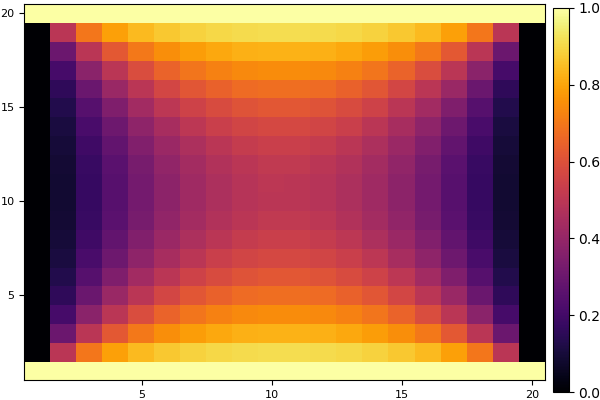

In [40]:
heatmap(potential2d)